In [1]:
import pandas as pd
import seaborn as sns
from scripts.data_processing import process_data
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
def met_season(date):
    date = time.strptime(date, "%d/%m")
    december = time.strptime('21/12', "%d/%m")
    march = time.strptime('21/03', "%d/%m")
    june = time.strptime('21/06', "%d/%m")
    september = time.strptime('21/09', "%d/%m")
    if date >= december or date < march:
        return 'summer'
    elif date >= march and date < june:
        return 'fall'
    elif date >= june and date < september:
        return 'winter'
    else:
        return 'spring'

In [ ]:
df['season'] = df_met.apply(lambda x: met_season(str(x['date'].day) + '/' + str(x['date'].month)), axis = 1)

In [11]:
def calculate_perceived_temperature(celsius, humidity, wind_speed):
    if celsius >= 27:
        f = celsius * 1.8 + 32
        return -42.379 + (2.04901523*f) + (10.14333127*humidity) - (.22475541*f*humidity) - (.00683783*f*f) - (.05481717*humidity*humidity) + (.00122874*f*f*humidity) + (.00085282*f*humidity*humidity) - (.00000199*f*f*humidity*humidity)
    elif celsius <= 10:
        return (12.1452 + 11.6222 * np.sqrt(wind_speed) - 1.16222 * wind_speed) * (33 - celsius)
    else:
        return celsius

In [12]:
df['perceived_temperature'] = df.apply(lambda x: 
                                       calculate_perceived_temperature(
                                           x['air_temp_dry_bulb'], 
                                           x['relative_humidity'], 
                                           x['wind_speed']), 
                                       axis = 1)

,date,precipitation_total,atmospheric_pressure_station_level,atmospheric_pressure_sea_level,atmospheric_pressure_max_prev_hour,atmospheric_pressure_min_prev_hour,global_radiation,station_CPU_temp,air_temp_dry_bulb,dew_point_temp,...,min_relative_humidity_prev_hour,relative_humidity,wind_direction,wind_max_gust,wind_speed,month,year,energy_demand,is_weekend,perceived_temperature
0,2023-01-01 00:00:00,0.0,950.739871,1016.242216,950.816513,950.148450,65.038247,24.223906,22.083037,19.330515,...,81.686883,84.857680,156.373688,4.351461,1.531581,1.0,2023.0,32183.885,True,22.083037
1,2023-01-01 01:00:00,0.0,951.112981,1016.720330,951.209387,950.724429,42.775175,23.635446,21.694538,19.266813,...,83.542707,86.458271,143.581532,4.019698,1.443589,1.0,2023.0,32196.682,True,21.694538
2,2023-01-01 02:00:00,0.0,951.025242,1016.685403,951.314641,950.908633,29.665854,23.134841,21.459765,19.135860,...,84.541839,86.880958,148.265861,4.121579,1.530713,1.0,2023.0,31539.570,True,21.459765
3,2023-01-01 03:00:00,0.0,950.541273,1016.239882,951.097254,950.511393,23.164785,22.740201,21.140563,19.073866,...,85.413578,88.044819,140.289399,4.023283,1.556923,1.0,2023.0,30699.367,True,21.140563
4,2023-01-01 04:00:00,0.0,949.894698,1015.596731,950.569857,949.875092,23.119580,22.397736,20.862481,18.979346,...,86.728647,88.962628,135.123881,3.897941,1.429525,1.0,2023.0,30126.195,True,20.862481


In [13]:
df['lag_1h'] = df['energy_demand'].shift(1, fill_value = 0)
df['lag_2h'] = df['energy_demand'].shift(2, fill_value = 0)
df['lag_3h'] = df['energy_demand'].shift(3, fill_value = 0)
df['lag_6h'] = df['energy_demand'].shift(6, fill_value = 0)
df['lag_12h'] = df['energy_demand'].shift(12, fill_value = 0)
df['lag_24h'] = df['energy_demand'].shift(24, fill_value = 0)
df['lag_48h'] = df['energy_demand'].shift(48, fill_value = 0)

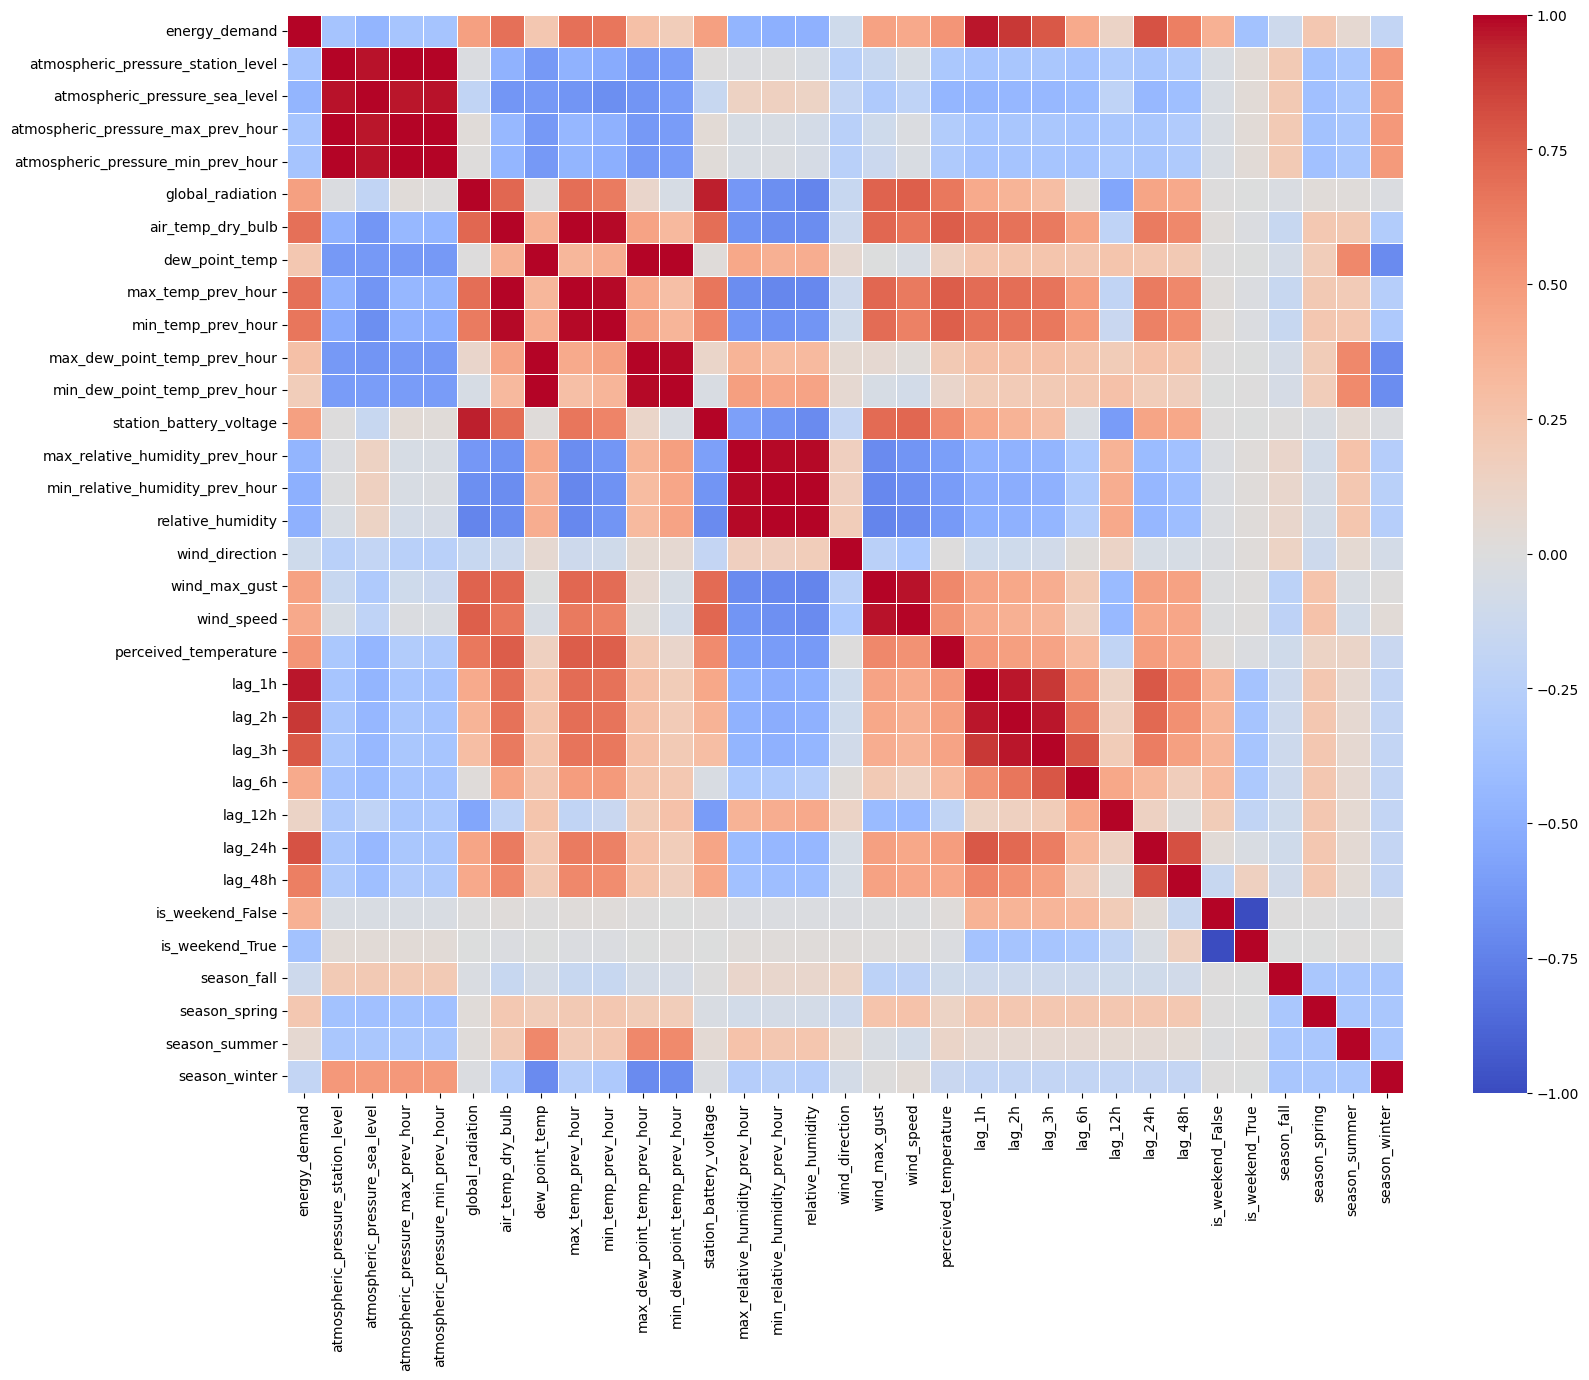

In [24]:

#fig = matrix.get_figure()
#fig.savefig("../figures/corr_matrix.png") 